In [ ]:
#importação de bibliotecas do py
import pandas as pd

#importação do dataset
df = pd.read_csv("D:/Downloads-UD/dataset-ap-geral.csv", sep=";", encoding="utf-8")

FUNÇÕES BÁSICAS DE VISUALIZAÇÃO DO DATASET

In [31]:
#número de linhas e colunas
df.shape

(8400, 17)

In [26]:
#primeiras 5 linhas do dataset
print(df.head(5))

     valor                                          descricao  \
0   753000  Em Construção  Entrega em Setembro de 2022.  O...   
1  2590000  Uma JOIA te esperando ! PORTEIRA FECHADA !  O ...   
2   579000  Venha morar 08 minutos a pé do metrô Santos Im...   
3   350000  * OPORTUNIDADE UNICA NA VILA LAURA   * 3 QUART...   
4   869000  O apartamento está localizado no bairro Jardim...   

                            local           bairro/cidade  quartos  garagem  \
0                Vila Guilhermina               São Paulo        3        1   
1                       Boqueirão                  Santos        3        3   
2                        Ipiranga               São Paulo        2        1   
3                      Vila Laura                Salvador        3        1   
4  Rua Corifeu de Azevedo Marques   Jardim das Indústrias        3        2   

   banheiro  area(m2)  iptu  condominio        novidade  suite  academia  \
0         2        84   150         550  Super destaque   

In [34]:
#tipos das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8400 entries, 0 to 8399
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   valor          8400 non-null   int64 
 1   descricao      8400 non-null   object
 2   local          8392 non-null   object
 3   bairro/cidade  8400 non-null   object
 4   quartos        8400 non-null   int64 
 5   garagem        8400 non-null   int64 
 6   banheiro       8400 non-null   int64 
 7   area(m2)       8400 non-null   int64 
 8   iptu           8400 non-null   int64 
 9   condominio     8400 non-null   int64 
 10  novidade       8400 non-null   object
 11  suite          8400 non-null   int64 
 12  academia       8400 non-null   int64 
 13  varanda        8400 non-null   int64 
 14  transporte     8400 non-null   int64 
 15  salao          8400 non-null   int64 
 16  planejado      8400 non-null   int64 
dtypes: int64(13), object(4)
memory usage: 1.1+ MB


In [30]:
#descritivo estatístico básico das colunas (contagem, média, variação, min, max, quartis)
df.describe()

,valor,quartos,garagem,banheiro,area(m2),iptu,condominio,suite,academia,varanda,transporte,salao,planejado
count,8.400000e+03,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000,8400.000000
mean,6.352529e+05,2.280952,1.334881,1.858333,81.174048,404.999167,743.600714,0.342381,0.027024,0.221905,0.097500,0.054286,0.096548
std,8.946930e+05,0.691395,1.534575,1.034781,81.131896,8282.061650,12854.697562,0.474535,0.162162,0.415552,0.296655,0.226594,0.295358
min,0.000000e+00,1.000000,0.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.845060e+05,2.000000,1.000000,1.000000,54.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.400000e+05,2.000000,1.000000,2.000000,69.000000,35.000000,398.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.900000e+05,3.000000,2.000000,2.000000,90.000000,250.000000,655.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.167700e+07,9.000000,120.000000,8.000000,4066.000000,752800.000000,750000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#valores nulos por colunas
df.isnull().sum()

valor            0
descricao        0
local            8
bairro/cidade    0
quartos          0
garagem          0
banheiro         0
area(m2)         0
iptu             0
condominio       0
novidade         0
suite            0
academia         0
varanda          0
transporte       0
salao            0
planejado        0
dtype: int64

ANÁLISE EXPLORATÓRIA

In [ ]:
#importação de bibliotecas do py

import matplotlib.pyplot as plt
import numpy as np

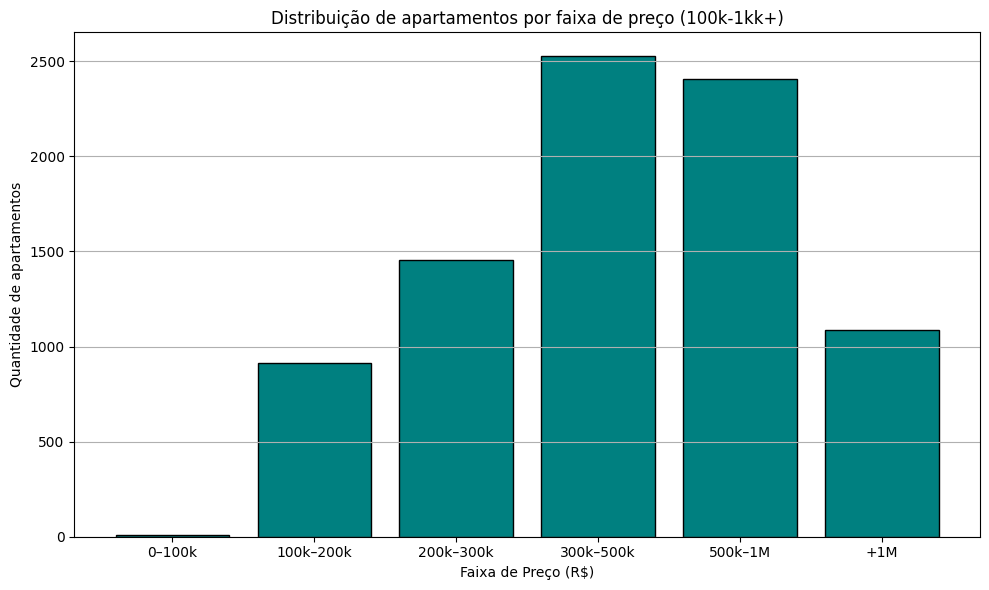

In [70]:
#HISTOGRAMA DE VALOR (100k - 1kk+)


#transformação simples: valor númerico
df = pd.read_csv("D:/Downloads-UD/dataset-ap-geral.csv", sep=";", encoding="utf-8")
df["valor"] = df["valor"].astype(str).str.replace(r"R\$", "", regex=True)\
                                     .str.replace(".", "", regex=False)\
                                     .str.replace(",", ".", regex=False)
df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
df = df[df["valor"].notnull() & (df["valor"] > 0)]

#faixas de preço manualmente setadas
bins = [0, 100_000, 200_000, 300_000, 500_000, 1_000_000, df["valor"].max()]
labels = ["0–100k", "100k–200k", "200k–300k", "300k–500k", "500k–1M", "+1M"]

#colunas categóricas para valores
df["faixa_preco"] = pd.cut(df["valor"], bins=bins, labels=labels, include_lowest=True)

freq = df["faixa_preco"].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(freq.index.astype(str), freq.values, color='teal', edgecolor='black')
plt.title("Distribuição de apartamentos por faixa de preço (100k-1kk+)")
plt.xlabel("Faixa de Preço (R$)")
plt.ylabel("Quantidade de apartamentos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


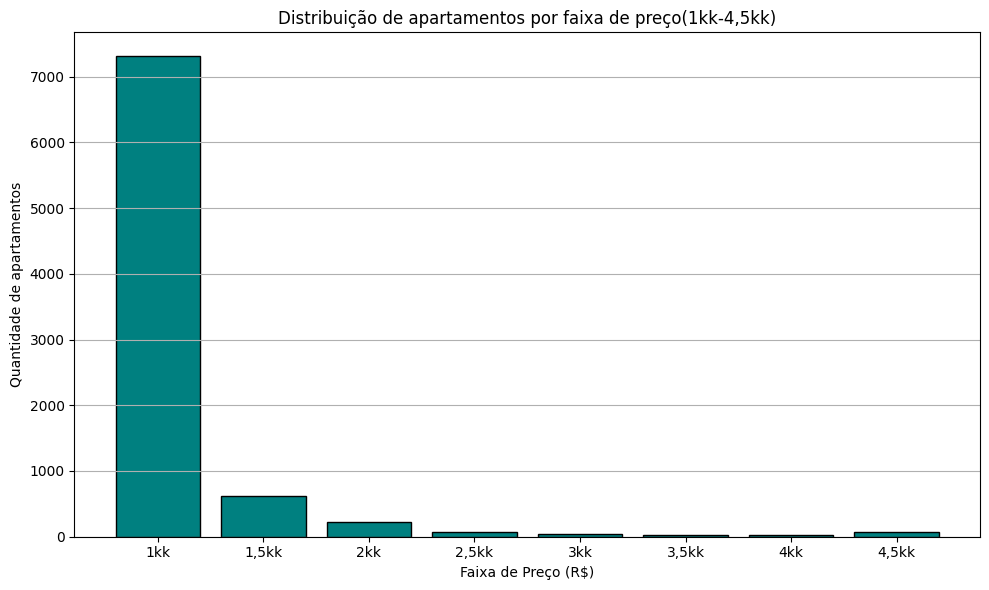

In [ ]:
#HISTOGRAMA DE VALOR (1kk - 4,5kk)


#transformação simples: valor númerico
df = pd.read_csv("D:/Downloads-UD/dataset-ap-geral.csv", sep=";", encoding="utf-8")
df["valor"] = df["valor"].astype(str).str.replace(r"R\$", "", regex=True)\
                                     .str.replace(".", "", regex=False)\
                                     .str.replace(",", ".", regex=False)
df["valor"] = pd.to_numeric(df["valor"], errors="coerce")
df = df[df["valor"].notnull() & (df["valor"] > 0)]

#faixas de preço manualmente setadas
bins = [0, 1_000_000, 1_500_000, 2_000_000, 2_500_000, 3_000_000, 3_500_000, 4_000_000, df["valor"].max()]
labels = ["1kk", "1,5kk", "2kk", "2,5kk", "3kk", "3,5kk", "4kk", "4,5kk"]

#colunas categóricas para valores
df["faixa_preco"] = pd.cut(df["valor"], bins=bins, labels=labels, include_lowest=True)

freq = df["faixa_preco"].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.bar(freq.index.astype(str), freq.values, color='teal', edgecolor='black')
plt.title("Distribuição de apartamentos por faixa de preço(1kk-4,5kk)")
plt.xlabel("Faixa de Preço (R$)")
plt.ylabel("Quantidade de apartamentos")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


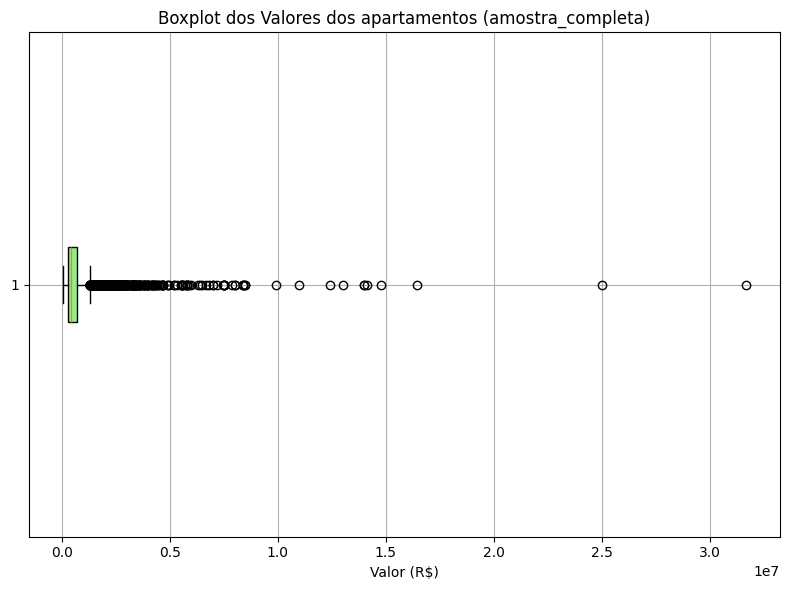

In [ ]:
#BOXPLOT DE VALOR

plt.figure(figsize=(8,6))
plt.boxplot(df["valor"], vert=False, patch_artist=True, boxprops=dict(facecolor='lightgreen', color='black'), whiskerprops=dict(color='black'))
plt.title("Boxplot dos Valores dos apartamentos (amostra_completa)")
plt.xlabel("Valor (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

USO DA RELAÇÃO PREÇO POR M2

In [85]:
#Ciação do variável preco/m2

if "area(m2)" in df.columns:
    #substitui vírgulas por pontos e converte para numérico (caso necessário)
    df["area"] = df["area(m2)"].astype(str).str.replace(",", ".")
    df["area"] = pd.to_numeric(df["area"], errors="coerce")

    #remove registros com área inválida ou zero para evitar divisões por zero
    df = df[df["area(m2)"].notnull() & (df["area(m2)"] > 0)]

    #calcula o preço por metro quadrado
    df["preco_m2"] = df["valor"] / df["area"]

    #exibe as 5 primeiras linhas
    print(df[["valor", "area(m2)", "preco_m2"]].head(10))
else:
    print("A coluna 'area' não foi encontrada no dataframe.")

     valor  area(m2)      preco_m2
0   753000        84   8964.285714
1  2590000       167  15508.982036
2   579000        54  10722.222222
3   350000        80   4375.000000
4   869000       122   7122.950820
5   950000       182   5219.780220
6   350000        64   5468.750000
7   285000        45   6333.333333
8   550000        70   7857.142857
9  2800000       287   9756.097561


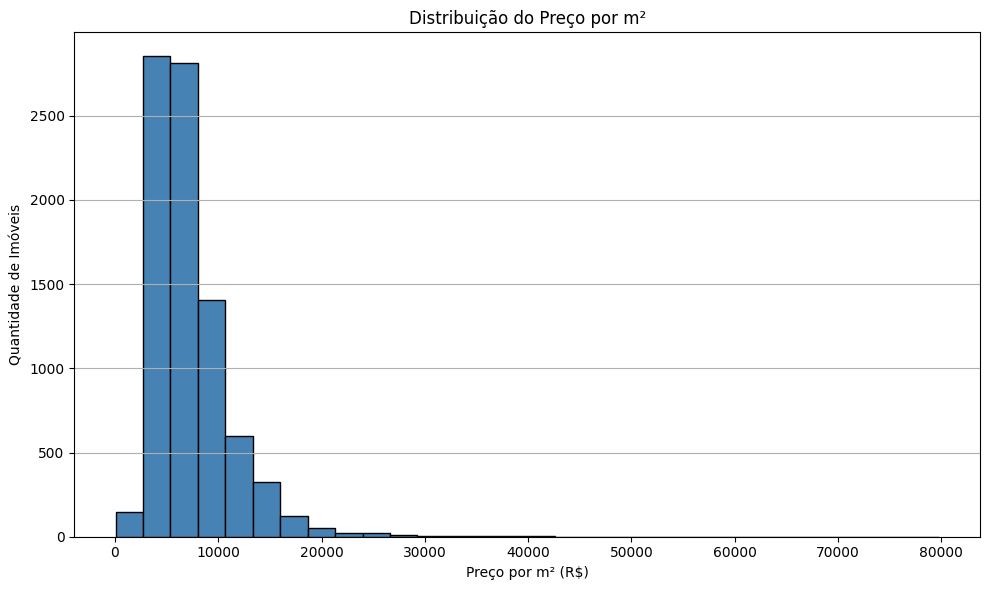

In [ ]:
#HISTOGRAMA COM TODOS OS PRECO/M2
plt.figure(figsize=(10,6))
plt.hist(df["preco_m2"], bins=30, color='steelblue', edgecolor='black')
plt.title("Distribuição do Preço por m²")
plt.xlabel("Preço por m² (R$)")
plt.ylabel("Quantidade de Imóveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Estatísticas dos Outliers em preco_m2:
count      368.000000
mean     19326.313591
std       6325.012356
min      14864.864865
25%      15823.654918
50%      17224.045802
75%      20233.463035
max      79750.000000
Name: preco_m2, dtype: float64

Número de outliers: 368

Valores dos primeiros outliers:
      valor  area      preco_m2
1   2590000   167  15508.982036
49  1700000   110  15454.545455
50  2400000   120  20000.000000
69  1090000    70  15571.428571
70   818000    54  15148.148148


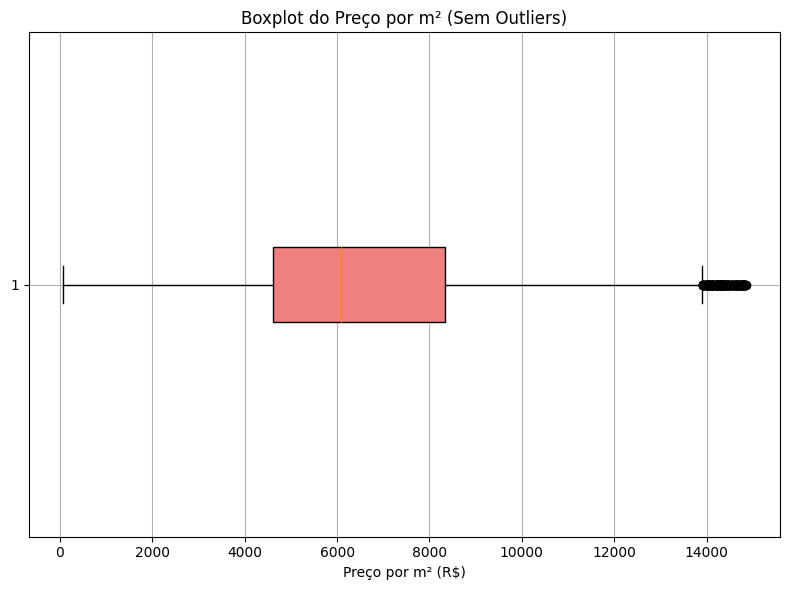

In [84]:
#BOXPLOT PRECO/M2 SEM OUTLIERS

#IQR para preco/m2
Q1_m2 = np.percentile(df["preco_m2"], 25)
Q3_m2 = np.percentile(df["preco_m2"], 75)
IQR_m2 = Q3_m2 - Q1_m2

lower_m2 = Q1_m2 - 1.5 * IQR_m2
upper_m2 = Q3_m2 + 1.5 * IQR_m2

#outliers
outliers_m2 = df[(df["preco_m2"] < lower_m2) | (df["preco_m2"] > upper_m2)]

#retirada de outliers
df_m2_sem_outliers = df[(df["preco_m2"] >= lower_m2) & (df["preco_m2"] <= upper_m2)]

#stats_outliers
print("Estatísticas dos Outliers em preco_m2:")
print(outliers_m2["preco_m2"].describe())

print(f"\nNúmero de outliers: {outliers_m2.shape[0]}")
print("\nValores dos primeiros outliers:")
print(outliers_m2[["valor", "area", "preco_m2"]].head())

#boxplot de preco/m2 sem outliers
plt.figure(figsize=(8,6))
plt.boxplot(df_m2_sem_outliers["preco_m2"], vert=False,
            patch_artist=True,
            boxprops=dict(facecolor='lightcoral', color='black'),
            whiskerprops=dict(color='black'))
plt.title("Boxplot do Preço por m² (Sem Outliers)")
plt.xlabel("Preço por m² (R$)")
plt.grid(True)
plt.tight_layout()
plt.show()

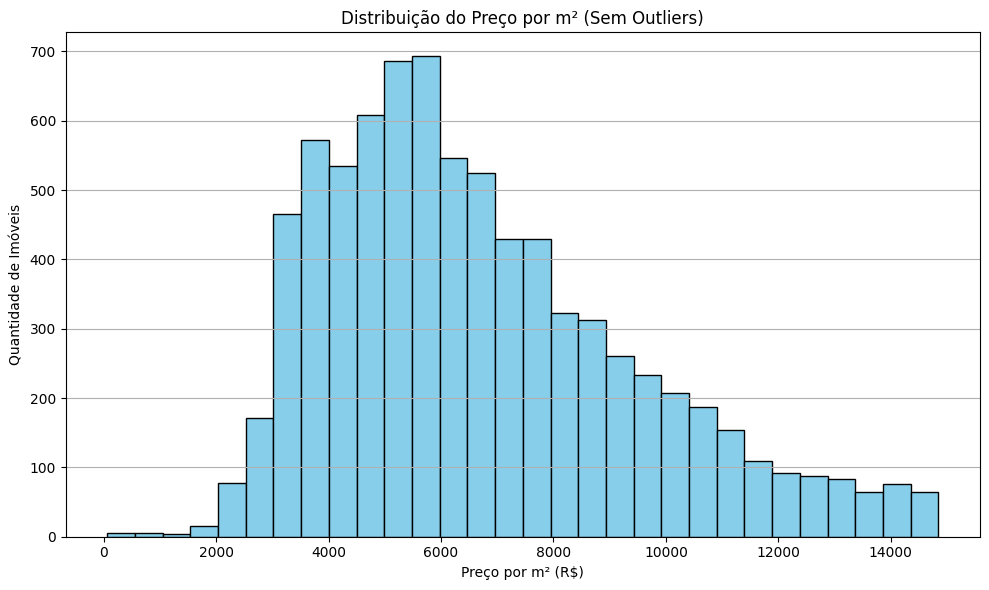

In [87]:
#HISTOGRAMA PRECO/M2 SEM OUTLIERS
plt.figure(figsize=(10,6))
plt.hist(df_m2_sem_outliers["preco_m2"], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribuição do Preço por m² (Sem Outliers)")
plt.xlabel("Preço por m² (R$)")
plt.ylabel("Quantidade de Imóveis")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [97]:
#iqr
Q1 = np.percentile(df["preco_m2"], 25)
Q3 = np.percentile(df["preco_m2"], 75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

#retirada de outliers
outliers = df[(df["preco_m2"] < limite_inferior) | (df["preco_m2"] > limite_superior)]

#stats
print("Estatísticas dos OUTLIERS em preco_m2:\n")
print(outliers["preco_m2"].describe())

#%outliers
percentual = (outliers.shape[0] / df.shape[0]) * 100
print(f"\nOutliers representam {percentual:.2f}% dos imóveis.\n")

#extremos
print("TOP 10 maiores valores de preco_m2 (outliers):")
print(outliers.sort_values("preco_m2", ascending=False)[["valor", "area(m2)", "preco_m2"]].head(10))

Estatísticas dos OUTLIERS em preco_m2:

count      368.000000
mean     19326.313591
std       6325.012356
min      14864.864865
25%      15823.654918
50%      17224.045802
75%      20233.463035
max      79750.000000
Name: preco_m2, dtype: float64

Outliers representam 4.38% dos imóveis.

TOP 10 maiores valores de preco_m2 (outliers):
         valor  area(m2)      preco_m2
576    1595000        20  79750.000000
7056  31677000       570  55573.684211
1586  14000000       270  51851.851852
8136   1967863        48  40997.145833
1921   1967863        48  40997.145833
2594  16450000       415  39638.554217
4272  13000000       343  37900.874636
1898   8400000       228  36842.105263
6793   8000001       220  36363.640909
496     360000        10  36000.000000


In [95]:
#bairros/cidades com mais outliers

if "bairro/cidade" in df.columns:
    print("\nTop bairros/cidades com + outliers de preço_m2:")
    print(outliers["bairro/cidade"].value_counts().head(10))


Top bairros/cidades com + outliers de preço_m2:
bairro/cidade
São Paulo         65
Pinheiros         23
Moema             21
Brooklin          18
Perdizes          18
Vila Mariana      16
Rio de Janeiro    15
Campo Belo        13
Vila Olímpia      11
Paraíso           11
Name: count, dtype: int64
